<a href="https://colab.research.google.com/github/shabnazghaffari/LaboratoryOfComputationalPhysics_Y4/blob/main/AdvStats_Proj_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **P02 - Naive Bayes classifier for Fake News recognition**
**Advanced Statistics 4 Physics Analysis 2023 - Group Assignment** <br>
Shabnaz Ghaffari (2040475)<br>
Maximilian Theodor Peter (2089859)

## **00 - Assignment Description**

*Description:* <br>
<hr style="border:2px solid gray">
Fake news are defined by the New York Times as ”a made-up story with an intention to deceive”, with the intent to confuse or deceive people. They are everywhere in our daily life, and come especially from social media platforms and applications in the online world. Being able to distinguish fake contents form real news is today one of the most serious challenges facing the news industry. Naive Bayes classifiers [1] are powerful algorithms that are used for text data analysis and are connected to classification tasks of text in multiple classes. The goal of the project is to implement a Multinomial Naive Bayes classifier in R and test its performances in the classification of social media posts.

*Bibliography / Data Source:*<br>
<hr style="border:2px solid gray">
[1] C. D. Manning, Chapter 13, Text Classification and Naive Bayes, in Introduction to Information Retrieval, Cambridge University Press, 2008 <br>
[2] Fake News Content Detection, KAGGLE data set: https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection?select=train.csv <br>
[3] Fake News: build a system to identify unreliable news articles https://www.kaggle.com/competitions/fake-news/data?select=train.csv


*Dataset Comment:* <br>
<hr style="border:2px solid gray">
Dataset [2] consists of a training set wth 10,240 instances and a test set with 1,267 instances. The test set is unlabelled, the training set is labelled as followed: <br>

| classifier | label|
|------------|-------|
| true  | 5          |
| mostly true | 3    |
| half true   | 2    |
| barely true | 0    |
| false | 1          |
| unknown | 4        |


Dataset [3] is completely unrelated to datasets [2] and has 20,799 instances, labelled as: <br>

| classifier | label|
|------------|-------|
| reliable  | 1      |
| unreliable | 0     |


*Tasks:* <br>
<hr style="border:2px solid gray">
1. Use training data of [2] to create a Naive Bayes Classifier. Evaluate.<br>
2. Apply the NBC on the related, unlabelled training set [2]. Examine.<br>
3. Apply the NBC on the unrelated, labelled dataset [3]. Examine.

## **01 - Approach**

*Refurbushing the task:* <br>
<hr style="border:2px solid gray">
- First, the training dataset [2] will be used to train the NBC and then later used on dataset [3]. The test dataset [2] does not allow us to get any information as it is no labelled. Therefore we drop it.<br>
- Second, labels in the training dataset can be seen as two-dimensional: true and known. We assume that if the label is in a degree of true (0-3,5), it is known, otherwise it is not (4). This makes a little bit more sense as the labels are not entirely independent from each other like "name"-labels.<br>
This opens up a little more complex analysis. So the labels will be split in 2 and independently investigated:<br>




| classifier  | label|
|-------------|------|
| true        | 1.00 |
| mostly true | 0.75 |
| half true   | 0.50 |
| barely true | 0.25 |
| false       | 0.00 |

| classifier  | label|
|-------------|------|
| known       | 1.00 |
| unknown     | 0.00 |

This way we introduce a continious label for true and known. This makes further sense for this assignment as we want to check dataset [3] that only provides the two labels "reliable" and "unreliable". We look at the results independently regarding "known" and "true" and will try to get these 2 parameter together as reliability can be seen as to which certainty we can say how true the text is.

*Note:*<br>
Tags & Titles will be dropped as well as authors for [3]. They would be interesting to investigate further, for example to find "fake news spreader" or for a more refined learning algorythm.

## **02 - Data Preparation**

*Libraries:* <br>
<hr style="border:2px solid gray">

In [ ]:
# INSTALL
#install.packages("tm")
#install.packages("SnowballC")
#install.packages("textstem")
#install.packages("ggplot2")
#install.packages("quanteda")
#install.packages("wordcloud")
install.packages("e1071")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [ ]:
#for data preparation
library(tm)        #
library(SnowballC) #
library(textstem)  # Stemming words
library(ggplot2)   # Plotting
library(quanteda)  #
library(wordcloud) # Visualize Vocublary
library(e1071)     # NBC


### **02.a) Import Data & Adjust Labels**

In [ ]:
data1_raw <- read.csv("train.csv")
data2_raw <- read.csv("dataset.csv")

In [ ]:
data1 <- data1_raw
data1$text <- data1$Text
data1$Text <- NULL
data1$known <- ifelse(data1_raw$Labels == 4, 0.00, 1.00)
data1$true <- ifelse(data1_raw$Labels == 1, 0,
                        ifelse(data1_raw$Labels == 2, 0.5,
                               ifelse(data1_raw$Labels == 3, 0.75,
                                      ifelse(data1_raw$Labels == 0, 0.25,
                                             ifelse(data1_raw$Labels == 5, 1, NA)))))
data1 <- data1[, !(names(data1) == "Text_Tag")]
data1 <- data1[, !(names(data1) == "Labels")]

In [ ]:
head(data1, 3)

,text,known,true
,<chr>,<dbl>,<dbl>
1,Says the Annies List political group supports third-trimester abortions on demand.,1,0.00
2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,1,0.50
3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",1,0.75


In [ ]:
 data2 <- data2_raw
 data2 <- data2[, !(names(data2) == "id")]
 data2 <- data2[, !(names(data2) == "title")]
 data2 <- data2[, !(names(data2) == "author")]

In [ ]:
head(data2, 1)

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### **02.b) Inspect Data**

*Dataset [2]:* <br>
<hr style="border:2px solid gray">

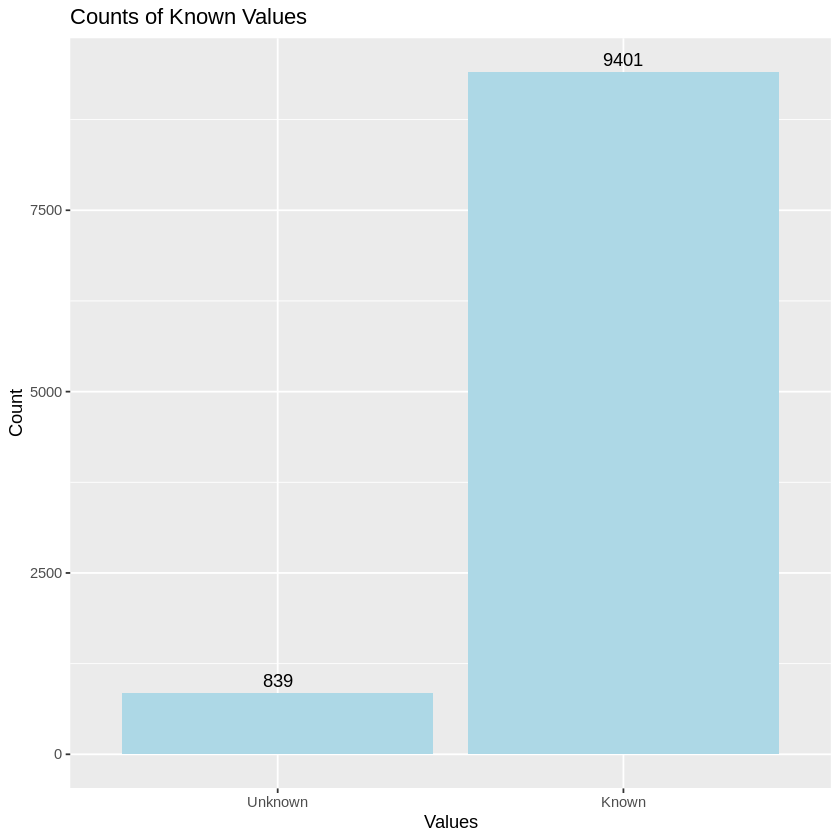

In [ ]:
counts_known <- table(data1$known)
df_counts_known <- data.frame(Value = as.numeric(names(counts_known)), Count = as.numeric(counts_known))

# Histogram
ggplot(df_counts_known, aes(x = factor(Value), y = Count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black") +
  labs(x = "Values", y = "Count", title = "Counts of Known Values") +
  scale_x_discrete(labels = c("Unknown", "Known"))

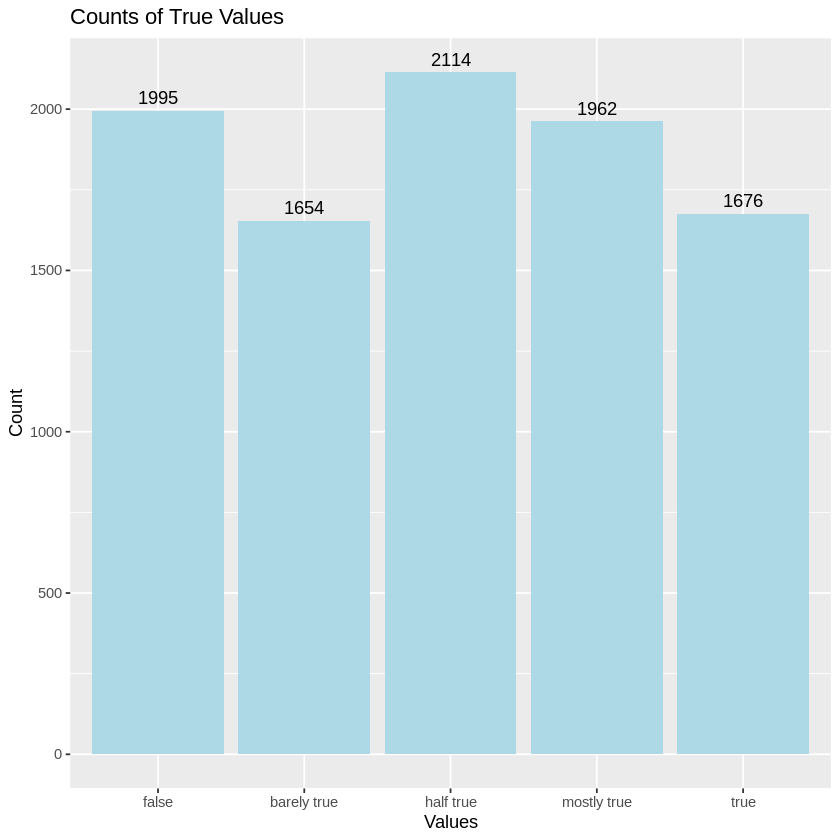

In [ ]:

counts_true <- table(data1$true)
df_counts_true <- data.frame(Value = as.numeric(names(counts_true)),Count = as.numeric(counts_true))

# Create a histogram
ggplot(df_counts_true, aes(x = factor(Value), y = Count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black") +
  labs(x = "Values", y = "Count",
       title = "Counts of True Values") +
         scale_x_discrete(labels = c("false", "barely true", "half true", "mostly true", "true"))

*Dataset [3]:* <br>
<hr style="border:2px solid gray">

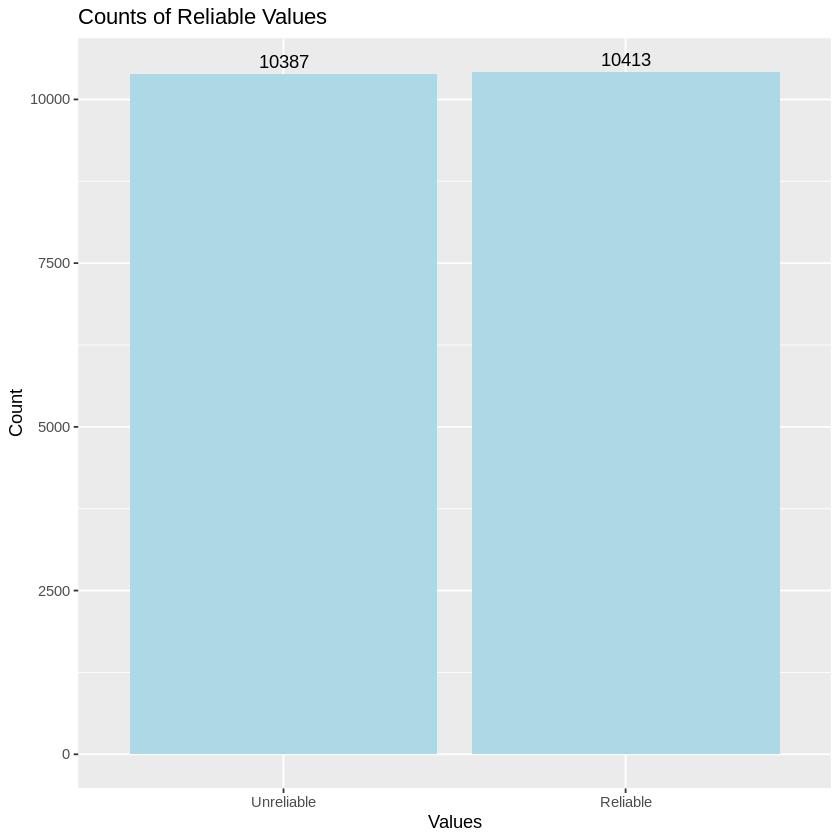

In [ ]:
counts_known <- table(data2$label)

# Convert counts to data frame
df2_counts_label <- data.frame(Value = as.numeric(names(counts_known)), Count = as.numeric(counts_known))

# Create a histogram for known values with data callouts
ggplot(df2_counts_label, aes(x = factor(Value), y = Count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black") +
  labs(x = "Values", y = "Count", title = "Counts of Reliable Values") +
  scale_x_discrete(labels = c("Unreliable", "Reliable"))

### **02.c) Pre-Processing & Tokenization**

In [ ]:
# DE_CONTRACTION
# - - - - - - - - - - - - - - - - - - - - - - - -
# De-Contraction manually, because library did not work
decontractData <- function(dataset, textColumn) {
  dataset[[textColumn]] <- gsub("don't", "do not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("can't", "can not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("won't", "will not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("couldn't", "could not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("shouldn't", "should not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("doesn't", "does not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("hasn't", "has not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("isn't", "is not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("aren't", "are not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("wasn't", "was not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("weren't", "were not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("haven't", "have not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("hadn't", "had not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("let's", "let us", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("I'm", "I am", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("you're", "you are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("they're", "they are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("he's", "he is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("she's", "she is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("it's", "it is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("you're", "you are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("he's", "he is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("she's", "she is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("it's", "it is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("we're", "we are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("they're", "they are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("that's", "that is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("there's", "there is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("can't", "cannot", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("don't", "do not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("won't", "will not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("isn't", "is not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("haven't", "have not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("doesn't", "does not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("let's", "let us", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("it's", "it is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("that's", "that is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("there's", "there is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("here's", "here is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("what's", "what is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("who's", "who is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("how's", "how is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("where's", "where is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("when's", "when is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("why's", "why is", dataset[[textColumn]])

    return(dataset)
}

In [ ]:
# CLEANING DATA
# - - - - - - - - - - - - - - - - - - - - - - - -
cleanData <- function(dataset, textColumn) {
  # Convert text to lowercase
  dataset[[textColumn]] <- tolower(dataset[[textColumn]])

  # Remove URLs (not sure if needed, just to be sure)
  dataset[[textColumn]] <- gsub("http\\S+|www\\S+", "", dataset[[textColumn]])

  # Remove "-" to make whole words out of it
  dataset[[textColumn]] <- gsub("-", "", dataset[[textColumn]])

  # Convert special apostrophes to regular apostrophes +  Expand contractions
  dataset[[textColumn]] <- gsub("\\’", "'", dataset[[textColumn]], perl = TRUE)

  # De-Contraction (manually unfortunately - see above)
  dataset <- decontractData(dataset, textColumn)

  # Replace punctuation with a space (if removed, might get weird word connections)
  dataset[[textColumn]] <- gsub("[[:punct:]]", " ", dataset[[textColumn]])

  # Remove special characters (anything not A-Z, a-z // includes numbers)
  dataset[[textColumn]] <- gsub("[^A-Za-z ]", "", dataset[[textColumn]])

  # ====================================================================

  # Tokenization
  dataset[[textColumn]] <- strsplit(dataset[[textColumn]], "\\s+")

  # Remove numbers
  dataset[[textColumn]] <- lapply(dataset[[textColumn]], function(tokens) {
    tokens[!grepl("\\d", tokens)]
  })

  # Remove stop words
  dataset[[textColumn]] <- lapply(dataset[[textColumn]], function(tokens) {
    tokens[!(tokens %in% stopwords("english"))]
  })

  # Lemmatization
  dataset[[textColumn]] <- lapply(dataset[[textColumn]], function(tokens) {
    lemmatize_words(tokens)
  })

  # Stemming
  dataset[[textColumn]] <- lapply(dataset[[textColumn]], function(tokens) {
    wordStem(tokens)
  })

  return(dataset)
}

*Preparing all data now:* <br>
<hr style="border:2px solid gray">

In [ ]:
data1_cleaned <- cleanData(data1, "text")
data2_cleaned <- cleanData(data2, "text")

                                                                                text
1 says the annies list political group supports third-trimester abortions on demand.
  known true
1     1    0
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

*vocabulary and feature-selection for later:* <br>
<hr style="border:2px solid gray">

In [ ]:
# VOCABULARY
# - - - - - - - - - - - - - - - - - - - - - - - -
createVocabulary <- function(dataset, textColumn) {
  tokens_data <- tokens(dataset[[textColumn]], tolower = TRUE)
  dtm <- dfm(tokens_data)
  term_freq <- colSums(dtm)
  vocabulary_data <- data.frame(Word = featnames(dtm), Occurrences = term_freq)
  # Sort occurrences
  vocabulary_data <- vocabulary_data[order(-vocabulary_data$Occurrences), ]

  return(vocabulary_data)
}

In [ ]:
# FEATURE SELECTION
# - - - - - - - - - - - - - - - - - - - - - - - -
featureSelection <- function(vocabulary, min_freq) {
  selected_features <- vocabulary$Word[vocabulary$Occurrences >= min_freq]
  return(selected_features)
}

### **02.d) Inspect Vocabulary for both datasets**

*Dataset 1 [2]* <br>
<hr style="border:2px solid gray">

In [ ]:
voc_1 <- createVocabulary(data1_cleaned, "text")
head(voc_1, 10)
length(voc_1)

Warning message:
“tolower argument is not used.”


,Word,Occurrences
,<chr>,<dbl>
sai,sai,2880
state,state,1371
percent,percent,1188
year,year,1182
tax,tax,1063
obama,obama,862
presid,presid,667
vote,vote,667
job,job,639


[1] 2

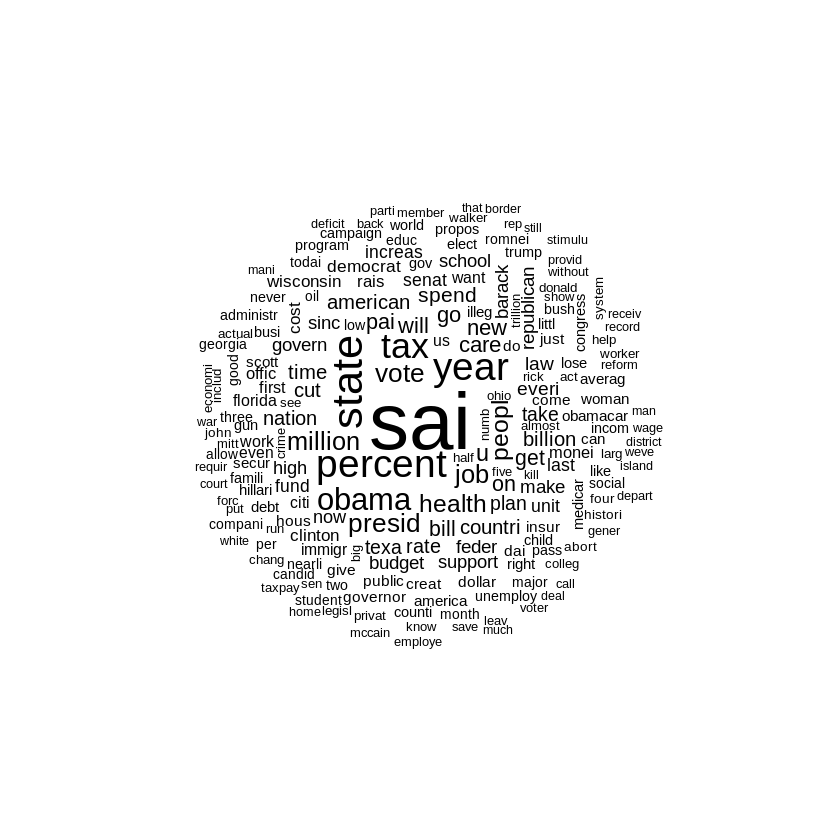

In [ ]:
wordcloud(voc_1$Word, voc_1$Occurrences,max.words=200,random.order=FALSE)


*Dataset 2 [3]* <br>
<hr style="border:2px solid gray">

In [ ]:
voc_2 <- createVocabulary(data2_cleaned, "text")
head(voc_2, 10)
length(voc_2)

Warning message:
“tolower argument is not used.”


,Word,Occurrences
,<chr>,<dbl>
sai,sai,102251
mr,mr,71413
trump,trump,56053
new,new,45081
on,on,39856
state,state,39433
peopl,peopl,36934
u,u,33271
year,year,32251


[1] 2

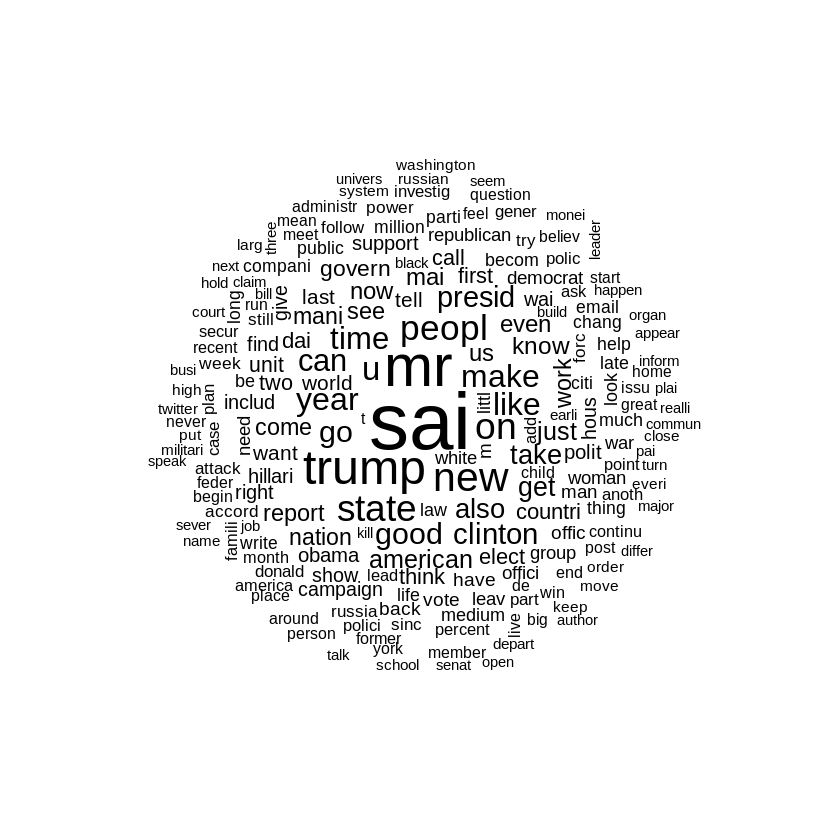

In [ ]:
wordcloud(voc_2$Word, voc_2$Occurrences,max.words=200,random.order=FALSE)

## **03 - NBC for "known"**

## **3.1 - Test / Training Data"**

In [ ]:
# set data / remove "true"
data1k <- data1_cleaned[, -which(names(data1_cleaned) == "true")]
# split 80/20 (= 8.392/2.048)
set.seed(123)
num_rows <- nrow(data1k)
index <- sample(1:num_rows, size = 0.8 * num_rows, replace = FALSE)
data1k_train <- data1k[index, ]
data1k_test  <- data1k[-index, ]

## **3.2 - No Feature Selection"**

In [ ]:
# set
features <- data1k_train$text
target   <- as.factor(data1k_train$known)

# DTM
corpus <- Corpus(VectorSource(features))
dtm    <- DocumentTermMatrix(corpus)

In [ ]:
# train
nbc_model <- naiveBayes(as.matrix(dtm), target)

In [ ]:
# predictions on test
test_features <- data1k_test$text
test_corpus   <- Corpus(VectorSource(test_features))
test_dtm      <- DocumentTermMatrix(test_corpus, control = list(dictionary = Terms(dtm)))
predictions   <- predict(nbc_model, as.matrix(test_dtm))

In [ ]:
x <- sum(predictions == "0")
cat(sum(x))

2048

In [ ]:
# ACCURACY
# ---------------------------
true_labels <- data1k_test$known
accuracy <- sum(predictions == true_labels) / length(true_labels)
cat("Accuracy Overall: ", accuracy, "\n")

Accuracy Overall:  0.0859375 


## **05 - "known" + "true"**

## **ASHABNAZ**

### 3.a) tokenize each word in the data set and split into tokens

### 3.b) clean the collection of words from stop words

### 3.c) perform token normalization

Functions
These functions are useful in the preprocessing of the text strings as they remove punctuations, numbers, common words, etc...

The process of cleaning the training and test data involves studying the training texts and extracting the vocabulary. However, to ensure consistent and clean input text for all subsequent studies, new sets of training and test data are created using the preprocessing functions defined earlier.

The General Multinomial Naive Bayes (NB) Classifier with add-one smoothing is a variant of the Naive Bayes algorithm used for text classification tasks. It is specifically designed for handling discrete features, such as word occurrences in text documents.

In the context of the Multinomial NB Classifier, "add-one smoothing" is a technique used to address the issue of zero probabilities. It involves adding a small constant (usually 1) to the frequency counts of each feature, both in the training and testing data, to prevent the occurrence of zero probabilities. This ensures that no feature is completely disregarded or considered impossible.

Here's a step-by-step outline of the General Multinomial NB Classifier with add-one smoothing:

1. Data Preparation: Preprocess and tokenize the text documents, converting them into a bag-of-words representation. This representation counts the occurrences of each word in a document.

2. Training: Calculate the prior probabilities of each class by dividing the number of documents in each class by the total number of documents. Compute the conditional probabilities of each word given each class by applying add-one smoothing to the word frequency counts.

3. Prediction: Given a new document, calculate the posterior probabilities for each class using Bayes' theorem. Multiply the prior probability of each class with the product of the conditional probabilities of the words in the document, considering add-one smoothing.

4. Class Selection: Select the class with the highest posterior probability as the predicted class for the new document.

The General Multinomial NB Classifier with add-one smoothing is a straightforward and efficient algorithm for text classification tasks. It assumes the independence of features (words) given the class, which is why it is called "naive." Despite its simplifying assumptions, Naive Bayes classifiers often perform well in practice, especially for large-scale text classification problems.

Score evaluation
After the calculation of the probabilities
, the score of an input text
 is computed with the formula


,

and the label is selected as

Accuracy evaluation

Application to fake news data (without features selection)

Example of score evaluation

Accuracy

Feature selection
In this section feature selection is implemented. We consider as feature utility the expected Mutual Information (MI) of the term
 and class
. We start by following a binary approach, where each document can either be in the selected class
 or not (
), and can either contain the term
 or not (
).

Mutual Information then can be estimated as:


where
 are the number of documents that have the corresponding values of
 and
 indicated by the 2 subscripts.

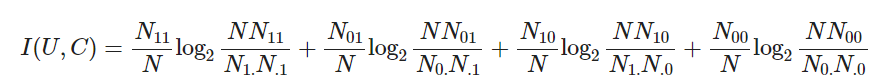

Use R library
Another classification attempt is performed by using the libraries available in R for text mining (tm) and for naiveBayes implementation (e1071). The input data is cleaned and the Document-Term matrix, which summarizes the occurences of each word in the training set, is computed. The function naiveBayes, given the input dataframe, computes the classifier. To simplify the training, only the words occurring at least 5 times are considered by the classifier.

Code adapted from the following notebook.

Pre-processing using text mining package

Summarize the accuracy of the models

### 3.d) build the vocabulary and perform feature selection


References
[1] C. D. Manning, Chapter 13, Text Classification and Naive Bayes, in Introduction to Information Retrieval, Cambridge University Press, 2008.

[2] Fake News Content Detection, KAGGLE data set: https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection